In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_startups = pd.read_csv('/Users/Sneha/Desktop/startup_funding.csv')
df_startups.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


#### 1. Your Friend has developed a Product and he wants to establish a product startup and he is searching for a perfect location where getting he has a high chance of getting investments. But due to financial restrictions, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend in deciding the location. NCR includes Gurgaon, Noida and New Delhi. Find the location where the most number of fundings is done. That means, find the location where startups have received funding maximum number of times. Plot the bar graph between location and number of fundings. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

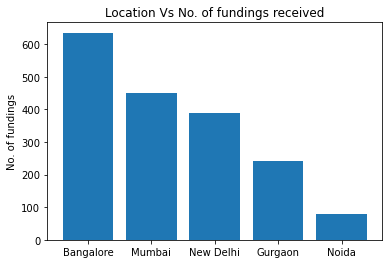

In [19]:
df_cities = df_startups.copy()
#df_cities.CityLocation.isnull().sum()

df_cities = df_cities[df_cities['CityLocation'].notna()]

def twoCities(city):
    return city.split('/')[0].strip()

df_cities['CityLocation'] = df_cities['CityLocation'].apply(twoCities)
df_cities['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
df_cities['CityLocation'].replace("bangalore", "Bangalore", inplace = True)

funds_dict = {}
target = ['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida']
funds_target= []
number_of_cities = df_cities['CityLocation'].value_counts()
cities = number_of_cities.index
fundings = number_of_cities.values

funds_dict = dict(zip(cities, fundings))

for i in target:
    if i in funds_dict.keys():
        funds_target.append(funds_dict.get(i))

plt.bar(target,funds_target)
plt.title('Location Vs No. of fundings received')
plt.ylabel('No. of fundings')
plt.show()

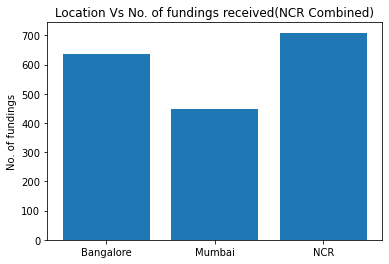

In [25]:
## Combining New Delhi, Gurgaon and Noida(NCR)
target_combined = ['Bangalore', 'Mumbai', 'NCR']
funds_target_combined = [funds_target[0], funds_target[1], sum(funds_target[2:])]

plt.bar(target_combined, funds_target_combined)
plt.title('Location Vs No. of fundings received(NCR Combined)')
plt.ylabel('No. of fundings')
plt.show()


In [ ]:
'''
From the two graphs above, we see that the number of fundings is higher for NCR(New Delhi, Gurgaon and Noida 
combined) compared to Bangalore and Mumbai. 
But if we see the NCR regions individually, all of them have lesser fundings than Bangalore. 
If my friend, decides on NCR region, the next question to be answered is, which city in the NCR region should he pick
from New Delhi, Gurgaon and Noida? Based on the data, New Delhi has the most number of fundings in the NCR region.
Hence, he should go with it. But the fundings for New Delhi is lesser than Bangalore. 

Based on the data, I would suggest my friend to open his product based startup in Bangalore as it has the highest
number of fundings received compared to other cities. 
'''

#### 2. Even after trying multiple times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

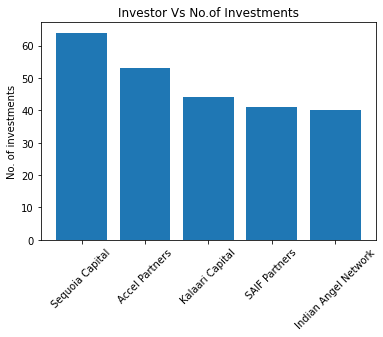

In [59]:
df_inv = df_startups.copy()
df_inv = df_inv[df_inv['InvestorsName'].notna()]
df_inv = df_inv[(df_inv['InvestorsName'] != 'Undisclosed Investors') & (df_inv['InvestorsName'] != 'Undisclosed investors')
               & (df_inv['InvestorsName'] != 'undisclosed investors') & (df_inv['InvestorsName'] != 'undisclosed Investors')]

investors= df_inv['InvestorsName']
investors = investors.values
investor_count = {}

for i in investors:
    if ',' not in i:
        if i in investor_count:
            investor_count[i] = investor_count.get(i) + 1
        else:
            investor_count[i] = 1
    else:
        string = i.strip().split(',')
        for j in string:
            if j.strip() in investor_count:
                investor_count[j.strip()] = investor_count.get(j.strip()) + 1
            else:
                investor_count[j.strip()] = 1

sorted_investor_count = sorted(investor_count.items(),key = lambda kv: kv[1], reverse = True)
sorted_investor_count = sorted_investor_count[0:5]

investor = []
investment = []
for i in sorted_investor_count:
    investor.append(i[0])
    investment.append(i[1])

plt.bar(investor, investment)
plt.title('Investor Vs No.of Investments')
plt.ylabel('No. of investments')
plt.xticks(rotation = 45)
plt.show()


#### 3. After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

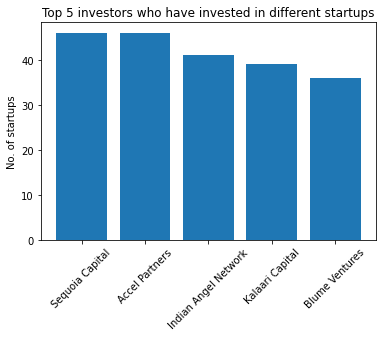

In [110]:
df = df_startups.copy()

df = df[pd.notna(df['StartupName'])]
df = df[pd.notna(df['InvestorsName'])]

df['StartupName'].replace('Olacabs', 'Ola', inplace = True)
df['StartupName'].replace('Ola Cabs', 'Ola', inplace = True)
df['StartupName'].replace('Flipkart.com', 'Flipkart', inplace = True)
df['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace = True)
df['StartupName'].replace('Oyo Rooms', 'Oyo', inplace = True)
df['StartupName'].replace('Oyorooms', 'Oyo', inplace = True)
df['StartupName'].replace('OyoRooms', 'Oyo', inplace = True)
df['StartupName'].replace('OYO Rooms', 'Oyo', inplace =True)

df = df[(df['InvestorsName']!='Undisclosed Investors') & (df['InvestorsName']!='Undisclosed investors')
               & (df['InvestorsName']!='undisclosed investors') & (df['InvestorsName']!='undisclosed Investors')
               & (df['InvestorsName']!='Undisclosed Investor')]

investors = {}

def startup_investors(startup_inv):
    startup_inv = str(startup_inv)
    startup_name = startup_inv.split('!!!')[0].strip().title()
    investor_names = startup_inv.split('!!!')[1]
    investor_names = investor_names.split(',')
    for name in investor_names:
        name = name.strip().title()
        if name!='':
            if investors.get(name) is None:
                investors[name] = set([startup_name])
            else:
                if startup_name not in investors[name]:
                    investors[name].add(startup_name)
    return startup_inv

df['startup_investor'] = df['StartupName'] + '!!!' + df['InvestorsName']
df['startup_investor'] = df['startup_investor'].apply(startup_investors)

no_of_investors = [[len(value),key]for key, value in investors.items()]
no_of_investors.sort(reverse=True)
investor = [ i[1] for i in no_of_investors[0:5]]
total = [ i[0] for i in no_of_investors[0:5]]

plt.bar(investor,total)
plt.xticks(rotation=45)
plt.title('Top 5 investors who have invested in different startups')
plt.ylabel('No. of startups')
plt.show()

#### 4. Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

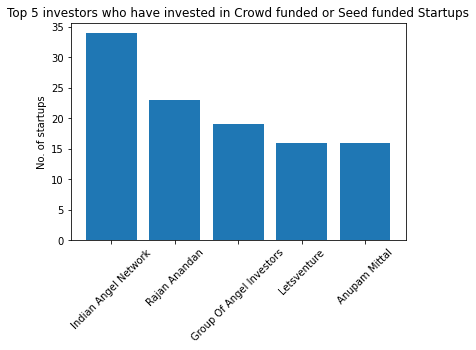

In [111]:
df_funds = df_startups.copy()
#df_funds['InvestorsName'].isnull().sum()

df_funds['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
df_funds['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace = True)
df_funds['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace = True)

df_funds['StartupName'].replace('Olacabs', 'Ola', inplace = True)
df_funds['StartupName'].replace('Ola Cabs', 'Ola', inplace = True)
df_funds['StartupName'].replace('Flipkart.com', 'Flipkart', inplace = True)
df_funds['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace = True)
df_funds['StartupName'].replace('Oyo Rooms', 'Oyo', inplace = True)
df_funds['StartupName'].replace('Oyorooms', 'Oyo', inplace = True)
df_funds['StartupName'].replace('OyoRooms', 'Oyo', inplace = True)
df_funds['StartupName'].replace('OYO Rooms', 'Oyo', inplace =True)

df_funds = df_funds[df_funds['StartupName'].notna()]
df_funds = df_funds[df_funds['InvestorsName'].notna()]
df_funds = df_funds[(df_funds['InvestmentType'] == 'Seed Funding') | (df_funds['InvestmentType'] == 'Crowd Funding')]

df_funds = df_funds[(df_funds['InvestorsName'] != 'Undisclosed Investors') & (df_funds['InvestorsName'] != 'Undisclosed investors')
               & (df_funds['InvestorsName'] != 'undisclosed investors') & (df_funds['InvestorsName'] != 'undisclosed Investors')
                & (df_funds['InvestorsName'] != 'Undisclosed Investor')]

investors = {}

def startup_investors(startup_inv):
    startup_inv = str(startup_inv)
    startup_name = startup_inv.split('!!!')[0].strip().title()
    investor_names = startup_inv.split('!!!')[1]
    investor_names = investor_names.split(',')
    for name in investor_names:
        name = name.strip().title()
        if name!='':
            if investors.get(name) is None:
                investors[name] = set([startup_name])
            else:
                if startup_name not in investors[name]:
                    investors[name].add(startup_name)
    return startup_inv

df_funds['startup_investor'] = df_funds['StarupName'] + '!!!' + df_funds['InvestorsName']
df_funds['startup_investor'] = df_funds['startup_investor'].apply(startup_investors)

no_of_investors = [[len(value),key]for key, value in investors.items()]
no_of_investors.sort(reverse=True)

investor = [ i[1] for i in no_of_investors[0:5]]
total = [ i[0] for i in no_of_investors[0:5]]

plt.bar(investor,total)
plt.xticks(rotation=45)
plt.title('Top 5 investors who have invested in Crowd funded or Seed funded Startups')
plt.ylabel('No. of startups')
plt.show()


#### 5. Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

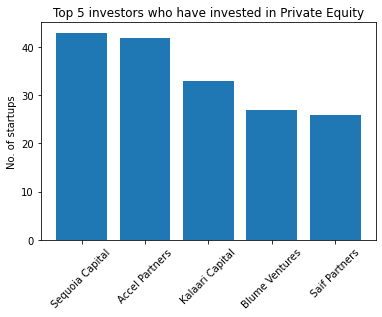

In [126]:
df_private = df_startups.copy()

df_private['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
df_private['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace = True)
df_private['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace = True)

df_private['StartupName'].replace('Olacabs', 'Ola', inplace = True)
df_private['StartupName'].replace('Ola Cabs', 'Ola', inplace = True)
df_private['StartupName'].replace('Flipkart.com', 'Flipkart', inplace = True)
df_private['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace = True)
df_private['StartupName'].replace('Oyo Rooms', 'Oyo', inplace = True)
df_private['StartupName'].replace('Oyorooms', 'Oyo', inplace = True)
df_private['StartupName'].replace('OyoRooms', 'Oyo', inplace = True)
df_private['StartupName'].replace('OYO Rooms', 'Oyo', inplace =True)

df_private = df_private[df_private['StartupName'].notna()]
df_private = df_private[df_private['InvestorsName'].notna()]

df_private = df_private[(df_private['InvestorsName'] != 'Undisclosed Investors') & (df_private['InvestorsName'] != 'Undisclosed investors')
               & (df_private['InvestorsName'] != 'undisclosed investors') & (df_private['InvestorsName'] != 'undisclosed Investors')
                & (df_private['InvestorsName'] != 'Undisclosed Investor')]

df_private = df_private[df_private['InvestmentType'] == 'Private Equity']

investors = {}

def startup_investors(startup_inv):
    startup_inv = str(startup_inv)
    startup_name = startup_inv.split('!!!')[0].strip().title()
    investor_names = startup_inv.split('!!!')[1]
    investor_names = investor_names.split(',')
    for name in investor_names:
        name = name.strip().title()
        if name!='':
            if investors.get(name) is None:
                investors[name] = set([startup_name])
            else:
                if startup_name not in investors[name]:
                    investors[name].add(startup_name)
    return startup_inv


df_private['startup_investor'] = df_private['StartupName'] + '!!!' + df_private['InvestorsName']
df_private['startup_investor'] = df_private['startup_investor'].apply(startup_investors)

no_of_investors = [[len(value),key]for key, value in investors.items()]
no_of_investors.sort(reverse=True)

investor = [ i[1] for i in no_of_investors[0:5]]
total = [ i[0] for i in no_of_investors[0:5]]

plt.bar(investor,total)
plt.xticks(rotation=45)
plt.title('Top 5 investors who have invested in Private Equity')
plt.ylabel('No. of startups')
plt.show()

